*   Name: Muhammad Bilal
*   Registration No. 2022359


# **Part 1: Data Exploration and Preprocessing**

## **1.1 Explore the Dataset**

*   load the dataset and display the first few rows.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


* Visualize the distribution of key features like ```Pclass```, ```Age```, ```Sex```, etc.

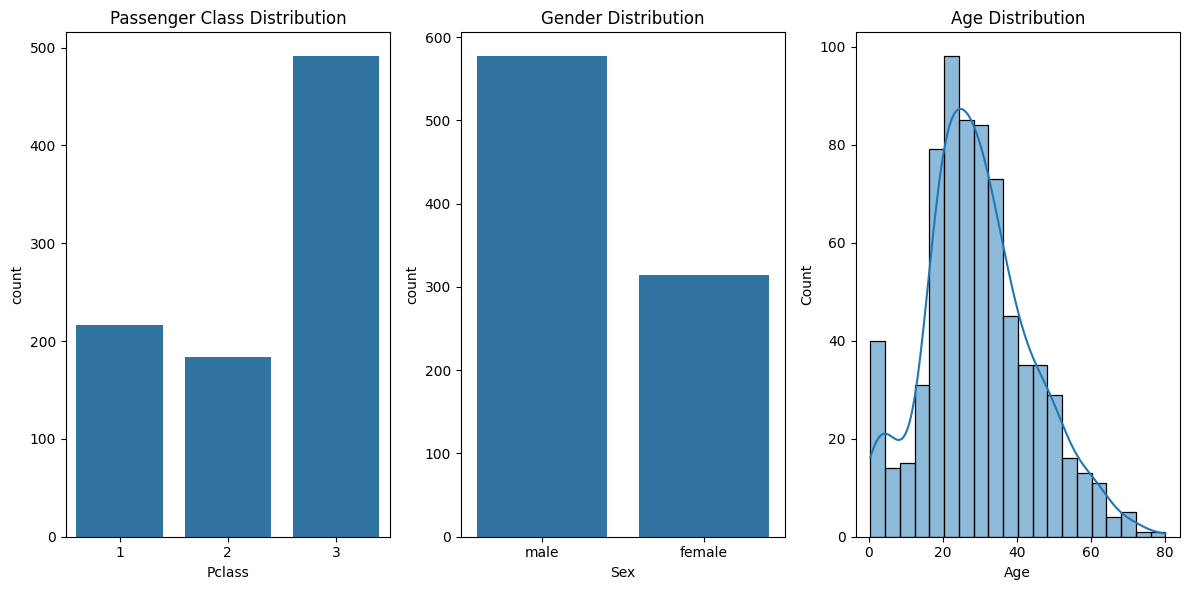

In [3]:
# Visualizing the distribution of key features
plt.figure(figsize=(12, 6))

# Plot the distribution of 'Pclass'
plt.subplot(1, 3, 1)
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Passenger Class Distribution')

# Plot the distribution of 'Sex'
plt.subplot(1, 3, 2)
sns.countplot(x='Sex', data=titanic_data)
plt.title('Gender Distribution')

# Plot the distribution of 'Age'
plt.subplot(1, 3, 3)
sns.histplot(titanic_data['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()


* Check for any missing values or outliers:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


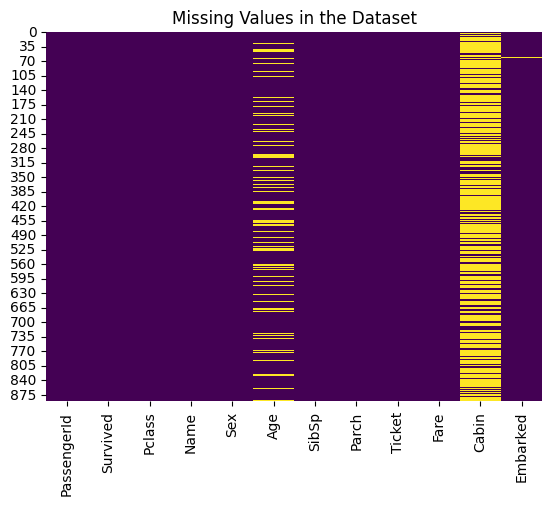

In [4]:
# Check for missing values
print(titanic_data.isnull().sum())

# Visualize missing values
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()


## **1.2 Data Preprocessing**
* Handle missing values by either filling them (e.g., with median) or removing records with missing data.

In [5]:
# Fill missing 'Age' values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most common port of embarkation
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

# Verify missing values have been handled
print(titanic_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


* Encode categorical variables like ```Sex``` and ```Embarked``` into numerical values:

In [6]:
# Encode 'Sex' to numerical values (0 for female, 1 for male)
titanic_data['Sex'] = titanic_data['Sex'].map({'female': 0, 'male': 1})

# Encode 'Embarked' using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)


* Standardize or normalize the numerical features like `Age` and `Fare`:

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize 'Age' and 'Fare'
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Display the processed data
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861      1   
2                             Heikkinen, Miss. Laina    0 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1   
4                           Allen, Mr. William Henry    1  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False        True  
1      0          PC 17599  0.786845       False       False  
2      0  STON/O2. 3101282 -0.488854       False        True  
3      0            113803  0.420730       False        True  

# **Part 2: Implementing k-NN & Decision Trees**

## **2.1 Model Training**
* Split the dataset into training and testing sets (70% training, 30% testing).

In [9]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = titanic_data.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = titanic_data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


* Implement the k-Nearest Neighbors (k-NN) algorithm and train the model using the training set.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

* Implement a Decision Tree algorithm and train it using the same training set.

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## **2.2 Model Evaluation**
* Use the test set to make predictions for both models.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions for k-NN model
knn_predictions = knn.predict(X_test)

# Predictions for Decision Tree model
dt_predictions = dt.predict(X_test)


* Evaluate the performance of each model using accuracy, precision, recall, and F1-score.

In [13]:
# Evaluation metrics for k-NN
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

# Evaluation metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

# Display results
print(f"k-NN Model: Accuracy = {knn_accuracy:.4f}, Precision = {knn_precision:.4f}, Recall = {knn_recall:.4f}, F1-Score = {knn_f1:.4f}")
print(f"Decision Tree Model: Accuracy = {dt_accuracy:.4f}, Precision = {dt_precision:.4f}, Recall = {dt_recall:.4f}, F1-Score = {dt_f1:.4f}")


k-NN Model: Accuracy = 0.7761, Precision = 0.7684, Recall = 0.6577, F1-Score = 0.7087
Decision Tree Model: Accuracy = 0.7500, Precision = 0.6964, Recall = 0.7027, F1-Score = 0.6996


* Compare the results and discuss which model performed better.

# **Part 3: Visualization**

## **3.1 Decision Boundaries**

* Create visualizations to display the decision boundaries of both models (k-NN and Decision Tree) using two features from the dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


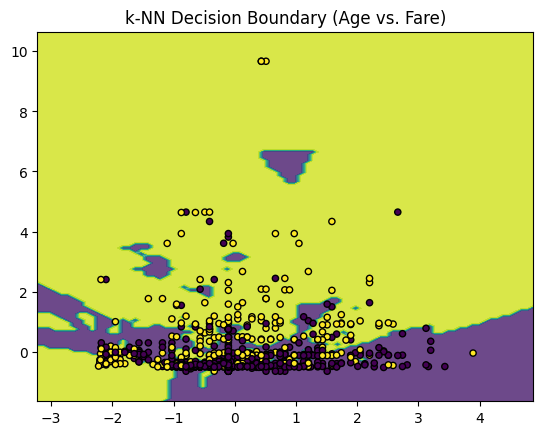

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


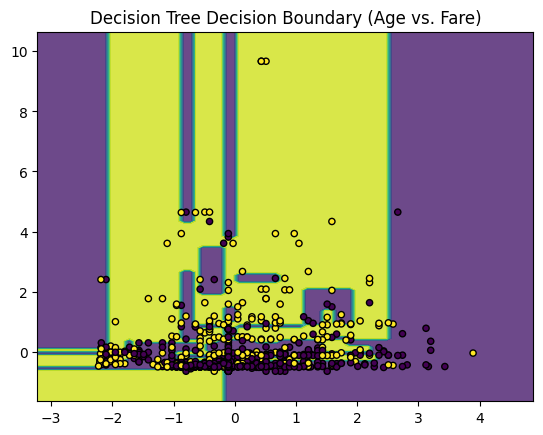

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.show()

# Use two features 'Age' and 'Fare' for visualization
X_vis = X[['Age', 'Fare']]

# Train models again on these two features
knn.fit(X_train[['Age', 'Fare']], y_train)
dt.fit(X_train[['Age', 'Fare']], y_train)

# Plot decision boundaries
plot_decision_boundary(X_vis, y, knn, "k-NN Decision Boundary (Age vs. Fare)")
plot_decision_boundary(X_vis, y, dt, "Decision Tree Decision Boundary (Age vs. Fare)")


## **3.2 Performance Visualization**
* Plot a bar chart showing the performance metrics (accuracy, precision, recall, F1-score) of both models for easy comparison.

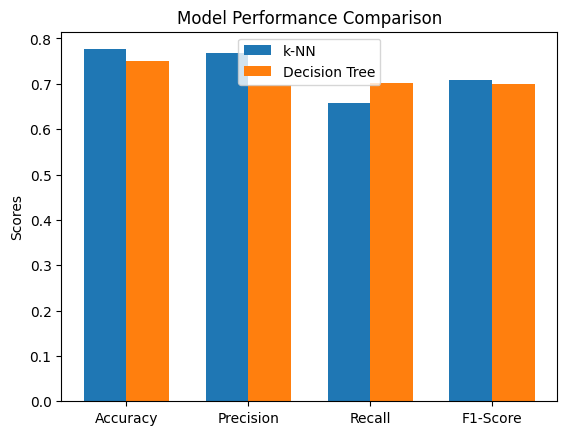

In [15]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]

# Bar plot
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, knn_scores, width, label='k-NN')
rects2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree')

# Add labels and title
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show plot
plt.show()
